In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import sys
import time
import sklearn
import tensorflow as tf
from tensorflow import keras
import pandas as pd

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd,  sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.1.0
sys.version_info(major=3, minor=7, micro=3, releaselevel='final', serial=0)
matplotlib 3.1.3
numpy 1.18.1
pandas 1.0.1
sklearn 0.22.2
tensorflow 2.1.0
tensorflow_core.python.keras.api._v2.keras 2.2.4-tf


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
# datasets 存储在home/.keras/datasets/
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [3]:
# 对数据进行标准化 (x - u) /std
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_valid_scaled = scaler.transform(x_valid.astype(np.float32).reshape(-1,1)).reshape(-1, 28,28)
x_test_scaled = scaler.transform(x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28, 28)


In [4]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation = 'relu'),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

In [6]:
# callbacks(TensorBoard, EarlyStopping, ModelCheckpoint)
# tensorboard --logdir callbacks
logdir = './callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir, 'fashion_mnist_model.h5')
callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file, save_best_only = True),
    keras.callbacks.EarlyStopping(patience = 5, min_delta = 1e-3),
]

history = model.fit(x_train_scaled, y_train, epochs = 10, validation_data = [x_valid_scaled, y_valid], callbacks = callbacks)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 3s 59us/sample - loss: 0.5401 - accuracy: 0.8105 - val_loss: 0.4069 - val_accuracy: 0.8622
Epoch 2/10
55000/55000 [==============================] - 3s 54us/sample - loss: 0.3933 - accuracy: 0.8589 - val_loss: 0.3604 - val_accuracy: 0.8692
Epoch 3/10
55000/55000 [==============================] - 3s 54us/sample - loss: 0.3534 - accuracy: 0.8708 - val_loss: 0.3549 - val_accuracy: 0.8716
Epoch 4/10
55000/55000 [==============================] - 3s 56us/sample - loss: 0.3286 - accuracy: 0.8813 - val_loss: 0.3466 - val_accuracy: 0.8744
Epoch 5/10
55000/55000 [==============================] - 3s 53us/sample - loss: 0.3083 - accuracy: 0.8876 - val_loss: 0.3315 - val_accuracy: 0.8830
Epoch 6/10
55000/55000 [==============================] - 3s 56us/sample - loss: 0.2925 - accuracy: 0.8944 - val_loss: 0.3192 - val_accuracy: 0.8852
Epoch 7/10
55000/55000 [==============================] -

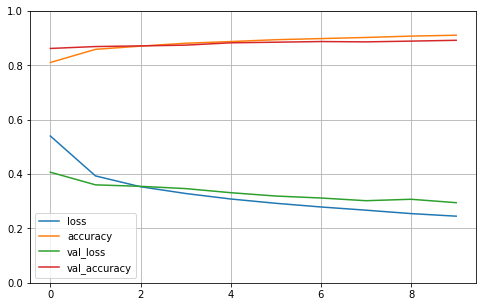

In [7]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize = (8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
    
plot_learning_curves(history)

In [8]:
model.evaluate(x_test_scaled, y_test)

10000/10000 [==============================] - 0s 22us/sample - loss: 0.3285 - accuracy: 0.8823


[0.3284566496729851, 0.8823]